## Principle Component Analysis

## Theory

Dimensionality Reduction is used to make input data less complex. However, simply projecting data onto a subset of the features loses too much information. Principle Component Analysis helps to reduce dimensionality strategically.

Principle Component Analysis (PCA) is a dimensionality reduction technique used to reduce the number of variables in a dataset while retaining as much information as possible. It is widely used in data analysis and machine learning because it can help to identify patterns in data and to reduce the number of variables in a dataset, which can improve the performance of models.

The basic idea behind PCA is to find a new set of variables, called principal components, that are linear combinations of the original variables, and that capture the most variability in the data. The first principal component is the direction in the data that has the most variance, and each subsequent principal component is orthogonal (perpendicular) to the previous ones and captures as much of the remaining variance as possible.

Here is the math behind PCA:

Let's say we have a dataset with n observations and p variables. We can represent the dataset as an n x p matrix X, where each row represents an observation and each column represents a variable. We want to find a new set of variables that are linear combinations of the original variables, so we can write:

$Y=XW$

where Y is an n x m matrix of principal components, W is a p x m matrix of weights (or loadings), and m is the number of principal components we want to keep. The columns of Y are the principal components, and the columns of W are the weights (or loadings) that tell us how much each original variable contributes to each principal component.

The goal of PCA is to find the weights matrix W that maximizes the variance of the principal components. The variance of the k-th principal component is given by:

$var(Y_k) = \frac{1}{n} \sum \limits_{i=1}^{n} y^2_{ik}$
 
where $y_{ik}$ is the k-th component of the i-th observation. We want to maximize the sum of the variances of the principal components subject to the constraint that the weights matrix W is orthogonal, which means that:

$W^TW=I$

where I is the identity matrix. This ensures that the principal components are uncorrelated.

To solve this optimization problem, we can use the Singular Value Decomposition (SVD) of the matrix X. The SVD decomposes X into:

$X=UΣV^T$
 
where U is an n x p matrix of left singular vectors, $\Sigma$ is a p x p diagonal matrix of singular values, and V is a p x p matrix of right singular vectors. The columns of U and V are orthonormal, which means that $U^TU = V^TV = I$. We can show that the weights matrix W is given by:

$W=V_m$
 
where $V_m$ is the matrix formed by the first m columns of V. The principal components are given by:

$Y=XV_m$
​
where X is the centered data matrix (i.e., the mean of each variable is subtracted from each observation).

PCA should be used when we have a dataset with many variables, some of which may be highly correlated, and we want to reduce the number of variables while retaining as much information as possible. PCA can also help to identify patterns in the data that may not be apparent when looking at the original variables.

By reducing the number of variables in a dataset, PCA can improve the performance of models by reducing the risk of overfitting, speeding up training time, and making it easier to interpret the results. However, it is important to note that PCA can also lead to loss of information, and that the interpretation of the principal components can be challenging. Therefore, it is important to carefully consider the trade-offs and to evaluate the impact of PCA on the performance of the models.

In summary, Principle Component Analysis (PCA) is a powerful technique for dimensionality reduction that can help to identify patterns in data and reduce the number of variables in a dataset while retaining as much information as possible. The math behind PCA involves finding a set of weights (or loadings) that maximize the variance of the principal components subject to the constraint that the weights matrix is orthogonal. PCA should be used when we have a dataset with many variables, some of which may be highly correlated, and we want to reduce the number of variables while retaining as much information as possible. PCA can improve the performance of models by reducing the risk of overfitting, speeding up training time, and making it easier to interpret the results, but it can also lead to loss of information and require careful evaluation of the trade-offs.

## Application

In our cbb dataset, we have seen many different statistics with varying importance and varying ranges. Let's, for the first time, analyze this aspect of our data using PCA. First, we gather our data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Load the data into a pandas dataframe
url = r"https://raw.githubusercontent.com/joshyaffee/A-First-Semester-of-Machine-Learning---INDE-577/main/cbb.csv"
df = pd.read_csv(url)
df = df.dropna()

X = df.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22]].values



And perform PCA. Below, you will see a Scree plot which shows how much of the variance within the data is contributed to from each principle component.

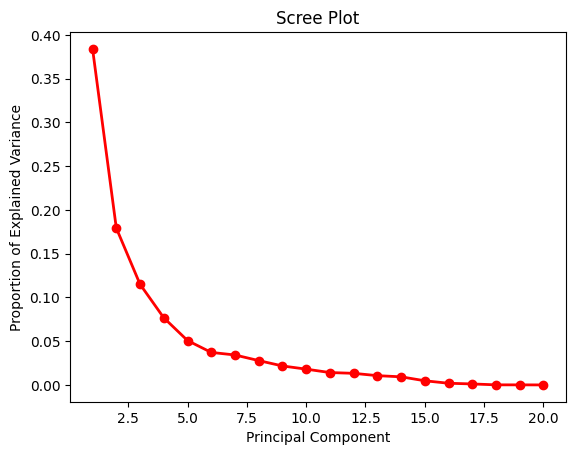

In [ ]:
# Instantiate PCA object with desired number of components
pca = PCA(n_components=20)

# Fit the PCA model to the data and transform it
principal_components = pca.fit_transform(X)

# Calculate the proportion of explained variance for each component
explained_variances = pca.explained_variance_ratio_

# Create a scree plot to visualize the significance of each component
component_indices = np.arange(1, pca.n_components_ + 1)
plt.plot(component_indices, explained_variances, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.show()

By selecting only the most important principle components and projecting our data onto the space spanned by these components, we can successfully reduce the dimensionality of the feature data while preserving as much important information as we can. Additionally, PCA can be used for various other purposes, such as:

Data visualization: PCA can be used to transform high-dimensional data into a low-dimensional space that can be visualized easily. This can help to identify patterns and relationships in the data that may not be apparent in the original space.

Feature extraction: PCA can be used to extract features from a dataset that can be used for further analysis or modeling. For example, PCA can be used to extract the most important features from an image dataset for image classification.

Noise reduction: If your dataset contains noise or outliers, PCA can help to reduce their impact by focusing on the most important sources of variability in the data.

Overall, PCA is a versatile technique that can be applied in many different domains and for various purposes, depending on the specific needs and goals of the analysis.